# Load data

First we download dataset. Source: https://www.kaggle.com/datasets/mchilamwar/predict-concrete-strength

In [1]:
import os
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

if not os.path.exists('./ConcreteStrengthData.csv'):
    !cp "/content/drive/My Drive/ConcreteStrengthData.csv" .

# We have to strip spaces, because they are inconsistent even in the header
df = pd.read_csv("ConcreteStrengthData.csv", sep="\s*,\s*")

df

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [3]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BlastFurnaceSlag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAshComponent,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WaterComponent,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SuperplasticizerComponent,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregateComponent,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregateComponent,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
AgeInDays,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [4]:
X = df[['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 
        'WaterComponent', 'SuperplasticizerComponent', 
        'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']]
y = df['Strength']

In [5]:
X.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47afb9ba90>,
      dtype=object)

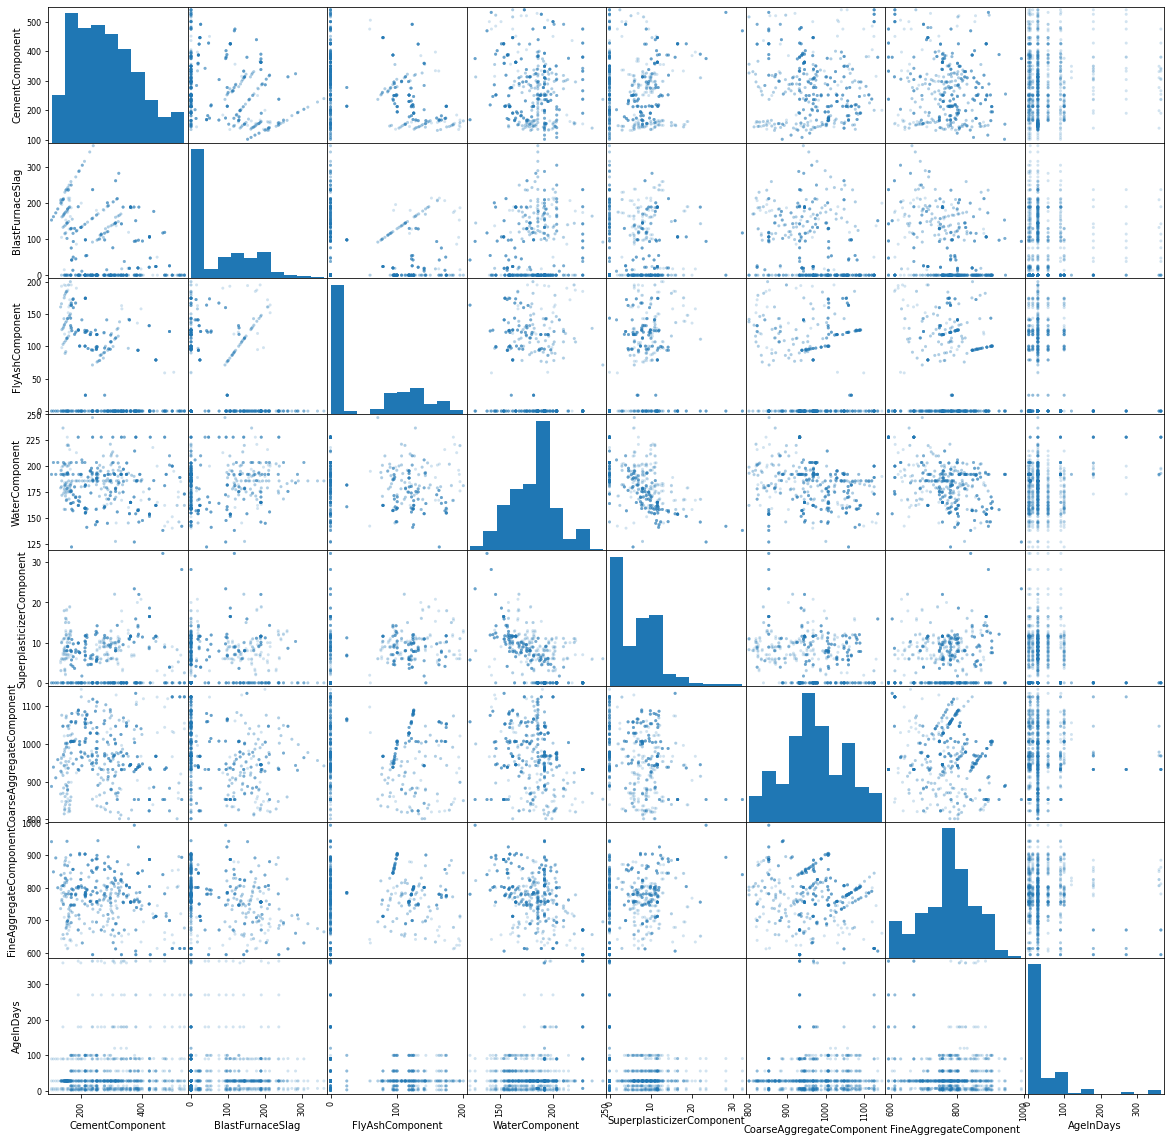

In [6]:
pd.plotting.scatter_matrix(X, alpha=0.2, figsize=(20,20))

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
models = {"LinearRegression": LinearRegression(),
          "KNeighbors": KNeighborsRegressor(n_neighbors=5),
	        "SVR": SVR(),
          "RandomForest": RandomForestRegressor(n_estimators=1000, max_features ='sqrt')}

In [9]:
results = {}
for m in models:
    models[m].fit(X_train, y_train)
    y_pred = models[m].predict(X_test)
    results[m] = y_pred, r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)
    print(f'''Model {m}
    r2_score {results[m][1]}
    mean_squared_error {results[m][2]}''')

from functools import reduce
best = reduce(lambda x, y: x if x[1][1] > y[1][1] else y, list(results.items()))[0]
print(f'\nBest model - {best}')

Model LinearRegression
    r2_score 0.5943782479239206
    mean_squared_error 109.75080797014404
Model KNeighbors
    r2_score 0.6769743859936284
    mean_squared_error 87.40241851132686
Model SVR
    r2_score 0.22594038929251514
    mean_squared_error 209.4406112526911
Model RandomForest
    r2_score 0.8778244931019982
    mean_squared_error 33.057548140817175

Best model - RandomForest


Model LinearRegression


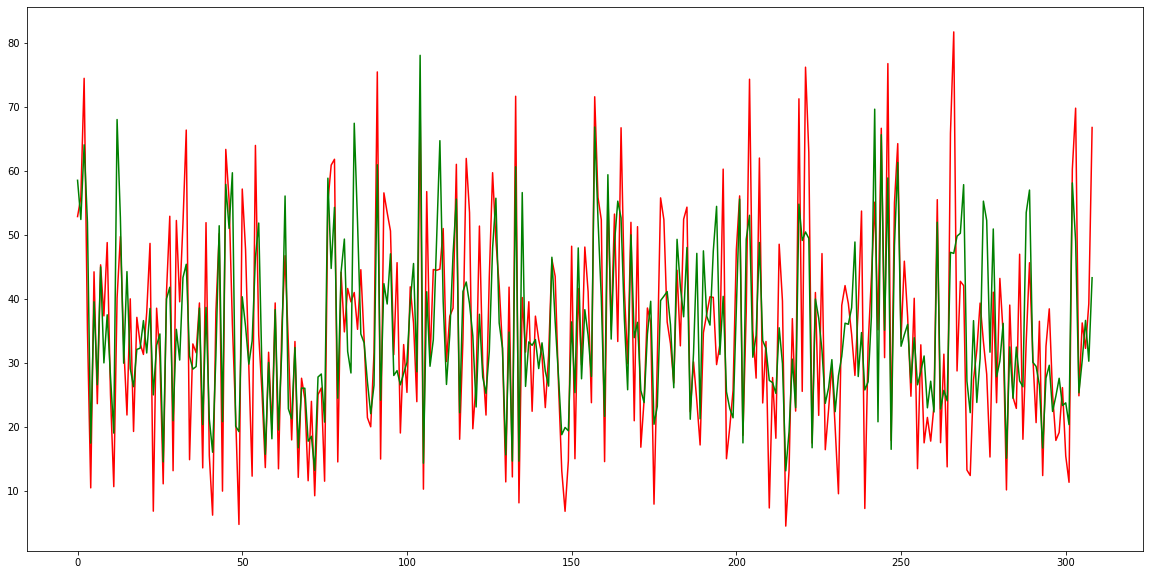

Model KNeighbors


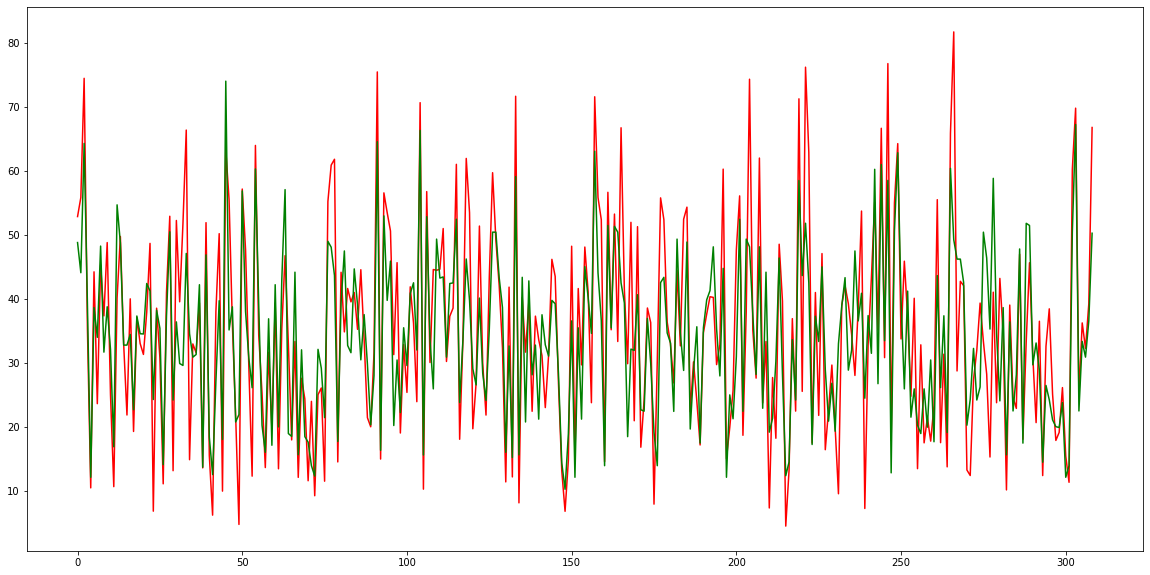

Model SVR


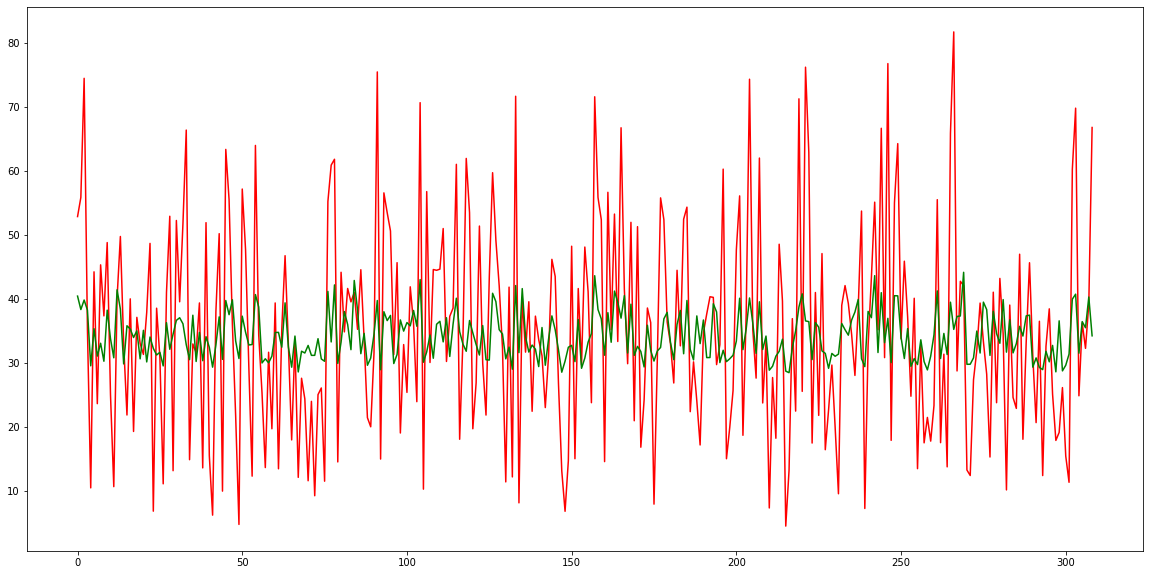

Model RandomForest


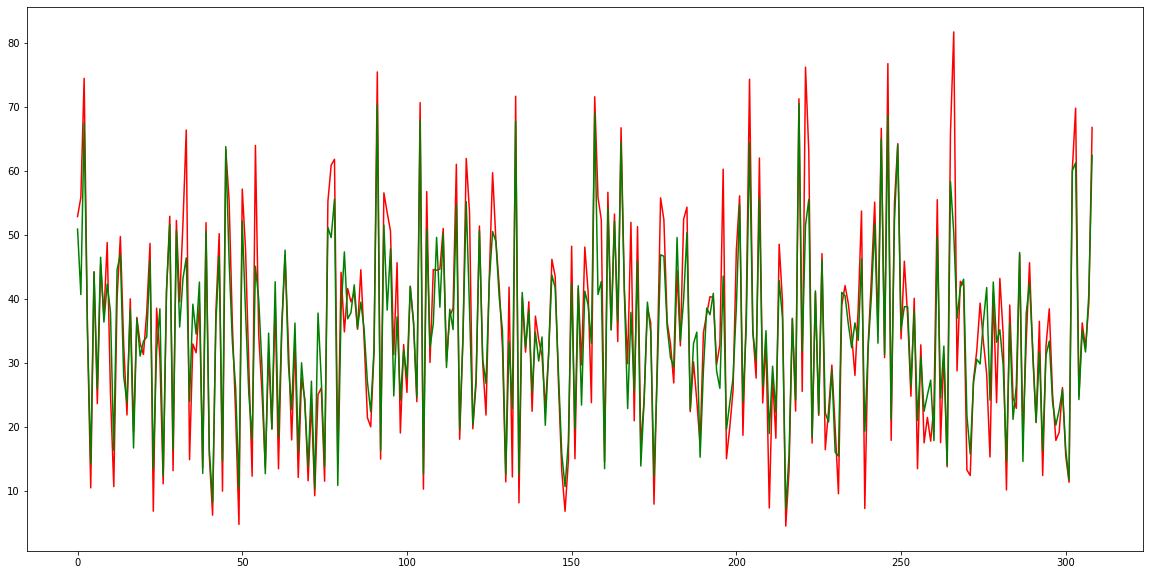

In [10]:
import matplotlib.pyplot as plt
for m in results:
    print(f"Model {m}")
    figure = plt.figure()
    figure.set_figwidth(20)
    figure.set_figheight(10)
    plt.plot(range(len(y_test)), y_test, 'r') 
    plt.plot(range(len(y_test)), results[m][0], 'g') 
    plt.show()